In [1]:
from __future__ import print_function

from imutils.object_detection import non_max_suppression
from imutils import paths

from FileSelector import *
from Recognizer import *

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import matplotlib.animation as animation

from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from matplotlib import style

import imageio

from PIL import Image
import imutils
import cv2

import json
import os
from pathlib import Path
import numpy as np

# Car Plate Detection

In [2]:
selector = SelectFilesButton()

In [3]:
selector

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

In [30]:
selector.files

['C:/Users/admin/Desktop/plate_project/assets/my_pedestrian_2.jpg']

### If you selected an image
##### If you have selected an image, please run the following cells, otherwise skip to where the video part is
You need to run the following cell. No parameters are required


In [5]:
my_image = os.path.normpath(selector.files[0])

In [6]:
# used for images when we draw the boxes using matplotlib
def get_boxes(node):
    boxes = []
    for result in node[0]['results']:
        box = result['box']
        pos, length, hight = (box['xmin'], box['ymin']), box['xmax'] - box['xmin'], box['ymax'] - box['ymin']
        boxes.append((pos, length, hight))
        
    return boxes

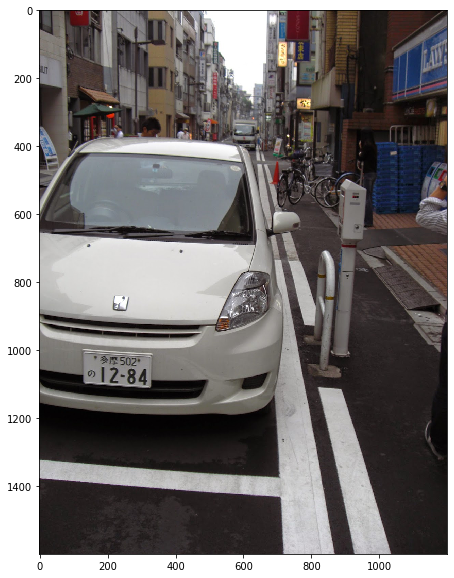

In [7]:
img = plt.imread(my_image)
plt.figure(figsize = (20,10))
plt.imshow(img)

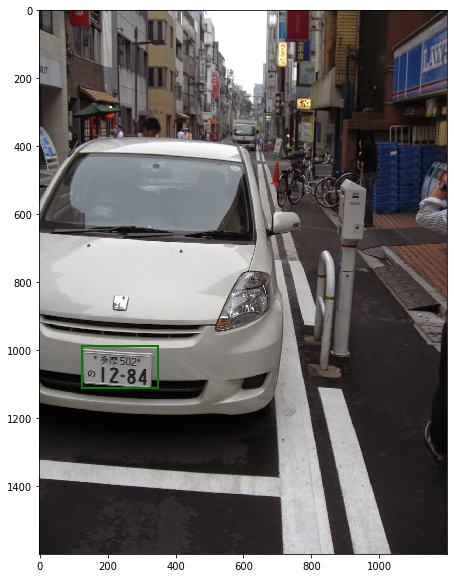

In [8]:
img = plt.imread(my_image)

node = recognize_img(my_image)
plt.figure(figsize = (20,10))
plt.imshow(img)
ax = plt.gca()

boxes = get_boxes(node)

for box in boxes:
    # Create a Rectangle patch
    rect = Rectangle(box[0],box[1],box[2],linewidth=2,edgecolor='g',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

### If you selected a video

The default values of parameters: $start = 0$, $end = False$, $skip = 3$

This will generate the info for the frames $[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39]$

In [25]:
my_video = os.path.normpath(selector.files[0])
my_dir = Path(my_video).parent

start = 2500
end = 3500
skip = 8

images, results = recognize_vid(my_video, start, end, skip)

Reading frame 2504
Reading frame 2512
Reading frame 2520
Reading frame 2528
Reading frame 2536
Reading frame 2544
Reading frame 2552
Reading frame 2560
Reading frame 2568
Reading frame 2576
Reading frame 2584
Reading frame 2592
Reading frame 2600
Reading frame 2608
Reading frame 2616
Reading frame 2624
Reading frame 2632
Reading frame 2640
Reading frame 2648
Reading frame 2656
Reading frame 2664
Reading frame 2672
Reading frame 2680
Reading frame 2688
Reading frame 2696
Reading frame 2704
Reading frame 2712
Reading frame 2720
Reading frame 2728
Reading frame 2736
Reading frame 2744
Reading frame 2752
Reading frame 2760
Reading frame 2768
Reading frame 2776
Reading frame 2784
Reading frame 2792
Reading frame 2800
Reading frame 2808
Reading frame 2816
Reading frame 2824
Reading frame 2832
Reading frame 2840
Reading frame 2848
Reading frame 2856
Reading frame 2864
Reading frame 2872
Reading frame 2880
Reading frame 2888
Reading frame 2896
Reading frame 2904
Reading frame 2912
Reading fram

In [26]:
# used for images when we draw the boxes using opencv
def get_boxes_cv(node):
    boxes = []
    for result in node['results']:
        box = result['box']
        boxes.append(((box['xmin'], box['ymin']), (box['xmax'], box['ymax'])))
    return boxes

In [27]:
frames = []
for i, r in zip(images, results):
    boxes = get_boxes_cv(r)
    if len(boxes) == 0:
        im_arr = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    else:
        for box in boxes:
            cv2.rectangle(i, box[0], box[1], color=(255, 0, 0), thickness=2)
        im_arr = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    frames.append(im_arr)

In [28]:
# save the gif file
temp_file = 'assets\\my_car.gif'
imageio.mimsave(temp_file, frames, duration=0.1)

In [29]:
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

In [24]:
display_gif(temp_file)

# Pedestrian Detection

In [32]:
select = SelectFilesButton()
select

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

### This will detect all pedestrian in a scene


In [33]:
my_image = os.path.normpath(select.files[0])

In [34]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [35]:
#image = cv2.imread(my_image)
image = mpimg.imread(my_image)
image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()

# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

# draw the final bounding boxes
for (xA, yA, xB, yB) in pick: cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

# number of boxes generated
filename = my_image
print("[INFO] {}: {} original boxes, {} after suppression".format(filename, len(rects), len(pick)))

[INFO] C:\Users\admin\Desktop\plate_project\assets\my_pedestrian_2.jpg: 4 original boxes, 4 after suppression


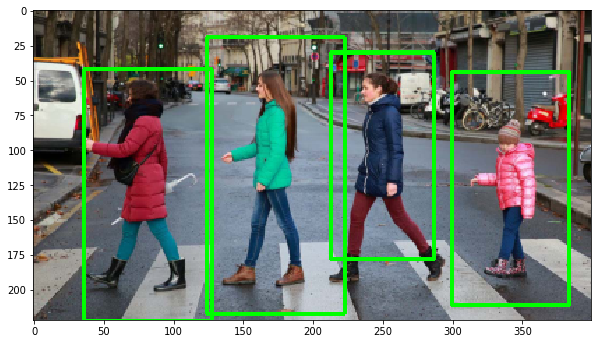

In [36]:
plt.figure(figsize = (10,10))
plt.imshow(image)

In [26]:
type(image)

numpy.ndarray